```
Topic:        Challenge Set 6
Subject:      Linear Regression and Learning Curve challenges
Date:         10/09/2017
Name:         Jeff Kao
Worked with:  Jeff Kao... :-(
```

# Week 3 Challenge: Luther (Linear Regression and Learning Curve challenges)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from numpy.random import random, normal, choice
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
xrange = 25
num_values = 400

In [3]:
B_0 = 3 * random()
B_1 = 3 * random()
epsilon = normal(size=num_values)
X = xrange * random(size=num_values)
y = B_0 + B_1 * np.log(X) + epsilon

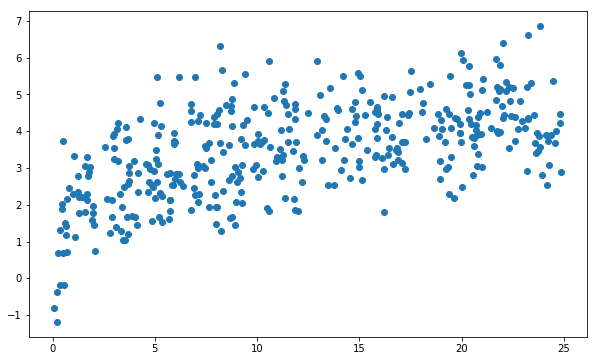

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.show()

In [5]:
X = X.reshape(-1, 1)
X_sq = X ** 2
log_X = np.log(X)
X_quad = np.hstack((X,X_sq))

In [6]:
lr_model_c1_quad = LinearRegression()
lr_model_c1_quad.fit(X_quad,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

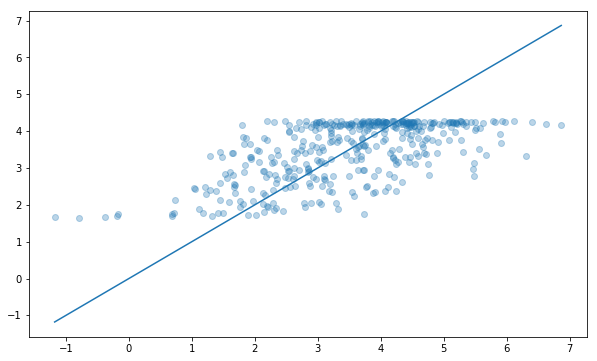

In [7]:
y_pred_quad = lr_model_c1_quad.predict(X_quad)
y_values = y
plt.figure(figsize=(10,6))
plt.scatter(y_values, y_pred_quad, alpha=0.3)
ymax = max(max(y_pred_quad),max(y_values))
ymin = min(min(y_pred_quad),min(y_values))
plt.plot(np.linspace(ymin,ymax,100),np.linspace(ymin,ymax,100))
plt.show()

In [8]:
lr_model_c1_log = LinearRegression()
lr_model_c1_log.fit(log_X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

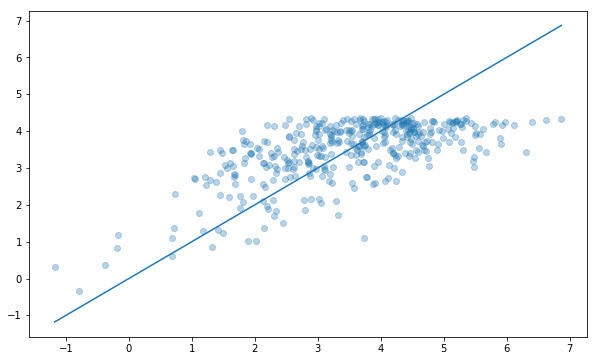

In [9]:
y_pred_log = lr_model_c1_log.predict(log_X)
y_values = y
plt.figure(figsize=(10,6))
plt.scatter(y_values, y_pred_log, alpha=0.3)
ymax = max(max(y_pred_log),max(y_values))
ymin = min(min(y_pred_quad),min(y_values))
plt.plot(np.linspace(ymin,ymax,100),np.linspace(ymin,ymax,100))
plt.show()

### Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [10]:
B_0 = 3 * random()
B_1 = 3 * random()
B_2 = 3 * random()
epsilon = normal(size=num_values)
X = xrange * random(size=num_values)
X = X.reshape(-1, 1)
y = B_0 + B_1 * X + B_2 * X ** 2 + epsilon

In [11]:
X_c2_train, X_c2_test, y_c2_train, y_c2_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
lr_model_c2 = LinearRegression()
lr_model_c2.fit(X_c2_train,y_c2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_pred = lr_model_c2.predict(X_c2_train)
y_true = y_c2_train
mean_squared_error(y_true, y_pred)

5980.4020682067539

In [14]:
y_pred = lr_model_c2.predict(X_c2_test)
y_true = y_c2_test
mean_squared_error(y_true, y_pred)

6172.1699167648094

### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC

In [15]:
X_c3_train, X_c3_test, y_c3_train, y_c3_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
num_degrees = 8
X_features_train = {}
X_features_test = {}
X_models = {}
training_error = {}
test_error = {}
training_r_sq = {}
test_r_sq = {}
aic = {}

for degree in range(num_degrees):
    #set up poly
    poly = PolynomialFeatures(degree=degree)
    
    #get the train/test features
    X_features_train[degree] = poly.fit_transform(X_c3_train)
    X_features_test[degree] = poly.fit_transform(X_c3_test)
    
    #train on training set
    X_models[degree] = LinearRegression()
    X_models[degree].fit(X_features_train[degree],y_c3_train)
    
    #make some predictions
    y_pred_train = X_models[degree].predict(X_features_train[degree])
    y_pred_test = X_models[degree].predict(X_features_test[degree])
    y_true_train = y_c3_train
    y_true_test = y_c3_test
    
    #calculate errors
    training_error[degree] = mean_squared_error(y_true_train, y_pred_train)
    test_error[degree] = mean_squared_error(y_true_test, y_pred_test)
    
    #calc r-sq
    training_r_sq[degree] = r2_score(y_true_train, y_pred_train)
    test_r_sq[degree] = r2_score(y_true_test, y_pred_test)

In [17]:
#plot the errors
degrees = range(num_degrees)

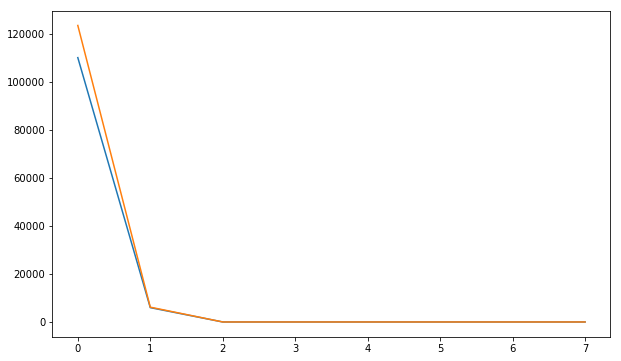

In [18]:
#train vs test for MSE
training_errors = [training_error[degree] for degree in degrees]
test_errors = [test_error[degree] for degree in degrees]
plt.figure(figsize=(10,6))
plt.plot(degrees, training_errors)
plt.plot(degrees, test_errors)
plt.show()

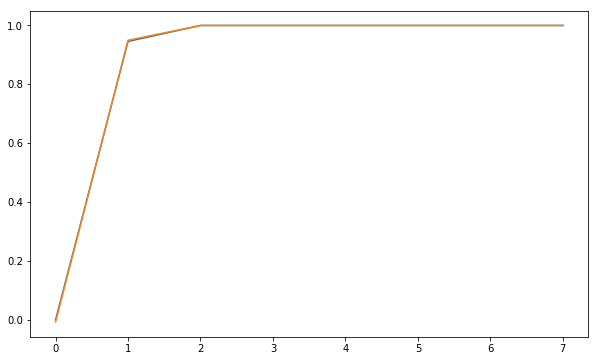

In [19]:
#train vs test for R^2
training_r_sqs = [training_r_sq[degree] for degree in degrees]
test_r_sqs = [test_r_sq[degree] for degree in degrees]
plt.figure(figsize=(10,6))
plt.plot(degrees, training_r_sqs)
plt.plot(degrees, test_r_sqs)
plt.show()

### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [28]:
#learning curve
max_count = len(X_c3_train)//5+1

In [29]:
X_features_train = {}
y_features_train = {}
X_models = {}
training_error = {}
test_error = {}

for i in range(1,max_count):
    X_features_train[i] = X_c3_train[:i*5,:]
    y_features_train[i] = y_c3_train[:i*5,:]
    
    #train on training set
    X_models[i] = LinearRegression()
    X_models[i].fit(X_features_train[i],y_features_train[i])
    
    #make some predictions
    y_pred_train = X_models[i].predict(X_features_train[i])
    y_pred_test = X_models[i].predict(X_c3_test)
    y_true_train = y_features_train[i]
    y_true_test = y_c3_test
    
    #calculate errors
    training_error[i] = mean_squared_error(y_true_train, y_pred_train)
    test_error[i] = mean_squared_error(y_true_test, y_pred_test)

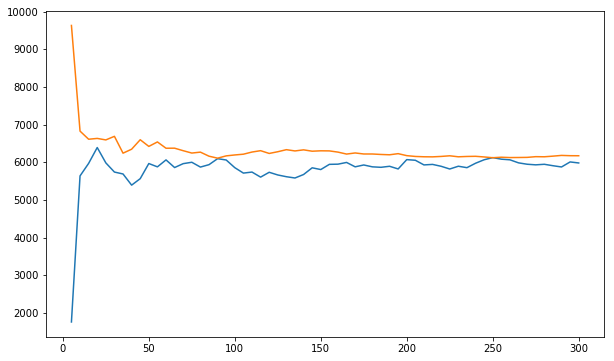

In [30]:
#train vs test for MSE
training_errors = [training_error[i] for i in range(1,max_count)]
test_errors = [test_error[i] for i in range(1,max_count)]
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,max_count)*5, training_errors)
plt.plot(np.arange(1,max_count)*5, test_errors)
plt.show()